In [435]:
import face_recognition
from face_recognition.face_recognition_cli import image_files_in_folder
import numpy as np
import os
import os.path
import pickle
from PIL import Image, ImageDraw
import glob 
import cv2
import imutils
from scipy.spatial import distance

cwd = os.getcwd()
inputDir = cwd + "/input"

image = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom.jpg")
face_locations = face_recognition.face_locations(image)
print(face_locations)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)
    
face_landmarks_list = face_recognition.face_landmarks(face_image, model='large')

[(201, 409, 468, 141)]


In [317]:
data_dir = "./input/known/known"
known_encodings = []
known_names = []

for class_dir in os.listdir(data_dir):
    if not os.path.isdir(os.path.join(data_dir, class_dir)):
        continue
    
    for img_path in image_files_in_folder(os.path.join(data_dir, class_dir)):
        image = face_recognition.load_image_file(img_path)
        face_locations = face_recognition.face_locations(image)
        
        print(img_path)
        
        known_encodings.append(face_recognition.face_encodings(image, known_face_locations=face_locations)[0])
        known_names.append(class_dir)
        
print("[INFO] serializing encodings...")
file_name = "encodings_all"
data = {"encodings": known_encodings, "names": known_names}
f = open(file_name, "wb")
f.write(pickle.dumps(data))
f.close()
print("save a pickle")

./input/known/known/katrin_winnick/katrin.jpg
./input/known/known/angelina_jolie/angela.jpg
./input/known/known/anthony_hopkins/Anthony_Hopkins.jpg
./input/known/known/tom_hardy/tom_hardy.jpg
./input/known/known/tom_hardy/tom_hardy2.jpg
./input/known/known/jessica_alba/jessica_alba.jpg
./input/known/known/leonardo_dicaprio/leo.jpg
./input/known/known/leonardo_dicaprio/leonardo.jpg
./input/known/known/olivia_wild/olivia_wild.jpg
./input/known/known/margot_robbie/margot.jpg
./input/known/known/margot_robbie/margot2.jpg
./input/known/known/michael_c_hall.jpeg/michael_c_hall.jpeg
./input/known/known/michael_c_hall.jpeg/dexter.jpg
./input/known/known/brad_pitt/brad.jpg
./input/known/known/orlando_bloom/Orlando_Bloom.jpg
./input/known/known/orlando_bloom/Orlando_Bloom_2.jpg
./input/known/known/orlando_bloom/Orlando_Bloom_3.png
./input/known/known/orlando_bloom/Orlando_Bloom_4.jpg
./input/known/known/orlando_bloom/tego_nie_rozpoznaje_przy_defaultowych_wartosciach.jpg
./input/known/known/ryan_

In [318]:
# otwieranie pliku z embedding znanych twarzy 
data = pickle.loads(open("./encodings_all", "rb").read())
print("load this shit")

load this shit


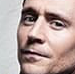

[19, 22]
ryan_gosling
{'ryan_gosling': 1, 'johnny_depp': 1}
./input/known/known/ryan_gosling


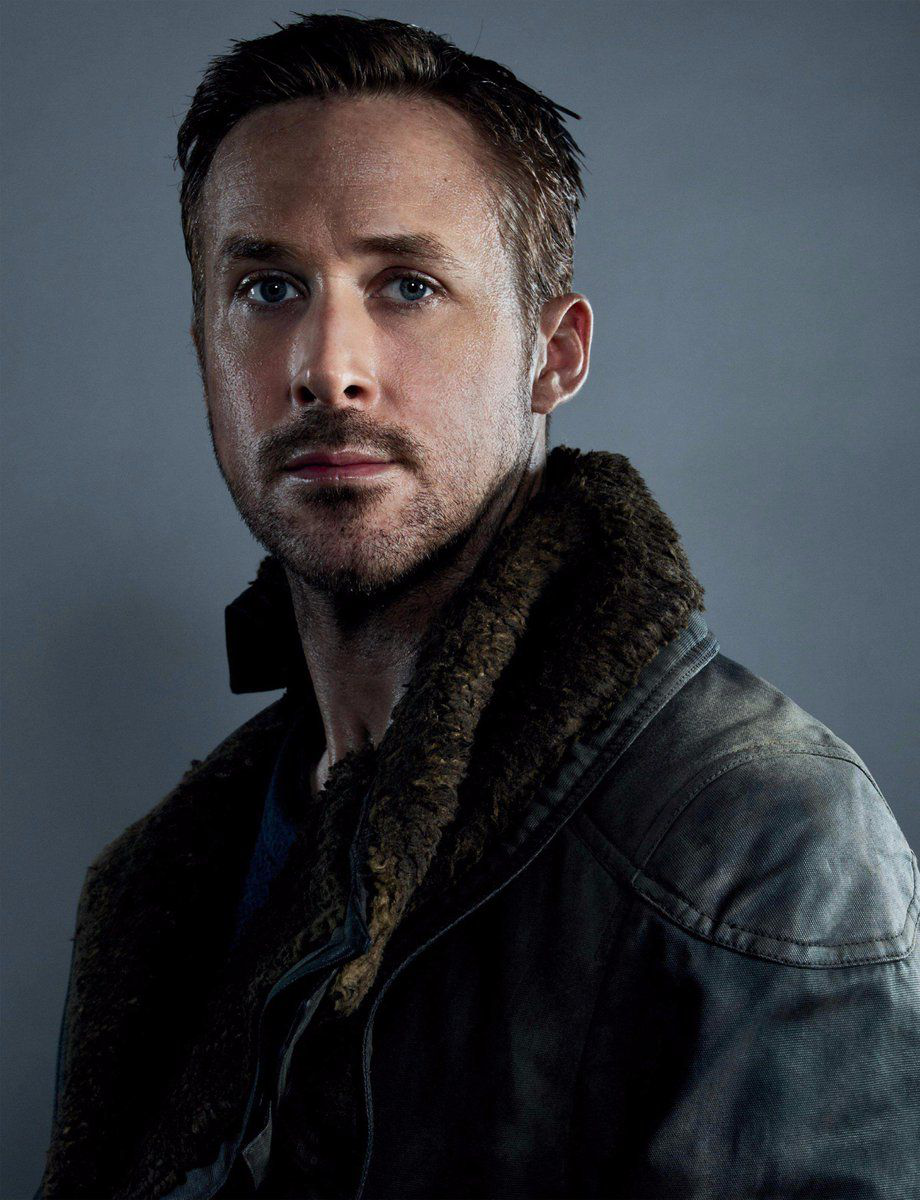

In [332]:
# porównywanie twarzy i zliczanie ilości występowanych zdjęć # kod podebrany z artykułu
image = face_recognition.load_image_file("./input/images/face5.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)

face_encoding = face_recognition.face_encodings(face_image)
names = []
display(pil_face_image)
for encoding in face_encoding:
    matche = face_recognition.compare_faces(data["encodings"], encoding, tolerance=0.7)
    name = "Unknown"
    if True in matche:
        matchedIdxs = [i for (i, b) in enumerate(matche) if b]
        counts = {}
        
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1

        name = max(counts, key=counts.get)

    names.append(name)

print(matchedIdxs)
print(name)
print(counts)
print("./input/known/known/" + names[0])
folder = "./input/known/known/" + names[0]
for asd in glob.iglob(f"{folder}/*"):
    if (asd.endswith(".jpg")):
        continue

image = face_recognition.load_image_file(asd)
pil_image = Image.fromarray(image)
display(pil_image)

matche:  [0.88366276 0.98042553 0.82964734 0.73140403 0.81091951 0.92415281
 0.80872732 0.81673182 0.97124033 0.99688474 1.03583316 0.88792383
 0.80068489 0.77198409 0.70409418 0.7433254  0.82135903 0.77577778
 0.75493565 0.69163188 0.74667091 0.92614964 0.66396067 0.75028572
 0.85285176]
0.6916318760535699
0.6639606727694687
name:  johnny_depp
winer 0.6639606727694687
id winer:  22
best score:  [0.6916318760535699, 0.6639606727694687]
../input/known/known/johnny_depp


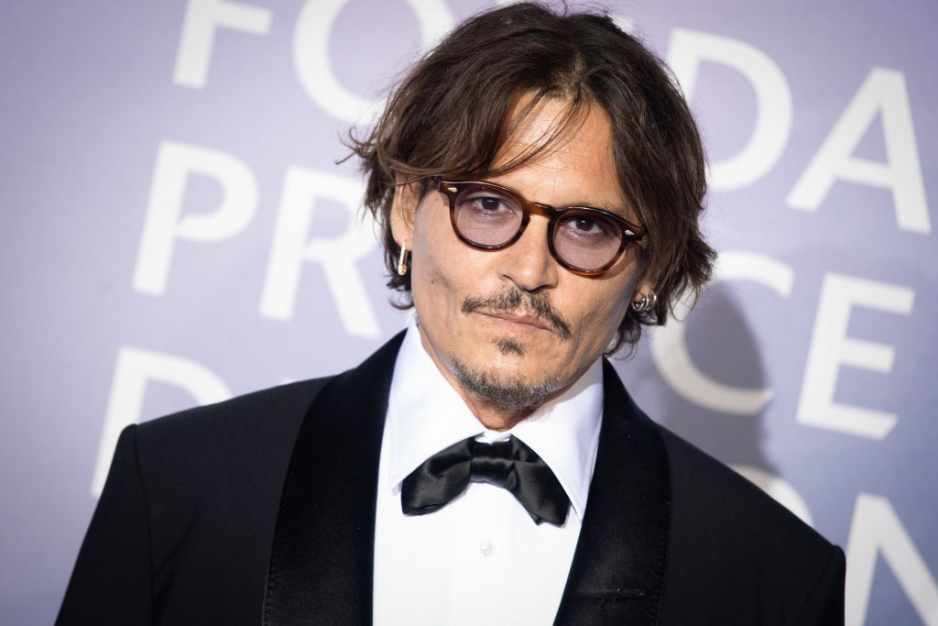

In [335]:
# Porównywanie twarzy z bazą twarzy. Jako output mamy wynik najlepszego podobieństwa, 
# numer id tego zdjęcia, nazwę celebryty i zdjęcie z folderu z jego imieniem
image = face_recognition.load_image_file("./input/images/face5.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)

face_encoding = face_recognition.face_encodings(face_image)
scores = []
for encoding in face_encoding:
    matche = face_recognition.face_distance(data["encodings"], encoding)
    print("matche: ", matche)
    name = "Unknown"
    for score in matche:
        i=0
        if score <= 0.7:
            print(score)
            scores.append(score)

    winer = min(scores)
    id_winer = np.where(matche==winer)
    name = data["names"][id_winer[0][0]]

print("name: ", name)
print("winer", winer)
print("id winer: ", id_winer[0][0])
print("best score: ", scores)

print("../input/known/known/" + name)
folder = "./input/known/known/" + name
for i in glob.iglob(f"{folder}/*"):
    if (i.endswith(".jpg")):
        continue

image = face_recognition.load_image_file(i)
pil_image = Image.fromarray(image)
display(pil_image)

In [340]:
# porównywanie pojedynczego zdjęcia 
image = face_recognition.load_image_file("./input/images/face4.jpg")
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)
    
face_encoding = face_recognition.face_encodings(face_image)[0]


unknown_image = face_recognition.load_image_file("./input/images/face5.jpg")
unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([face_encoding], unknown_face_encoding, tolerance=0.4)

if result[0]:
    print("True")
else:
    print("False")
    

True


I found 1 face(s) in this photograph.
The chin in this face has the following points: [(773, 66), (770, 73), (769, 80), (768, 89), (768, 98), (768, 107), (770, 115), (773, 121), (779, 124), (790, 125), (802, 124), (813, 121), (823, 116), (830, 108), (834, 99), (837, 89), (840, 79)]
The left_eyebrow in this face has the following points: [(773, 59), (776, 55), (780, 54), (785, 56), (789, 59)]
The right_eyebrow in this face has the following points: [(795, 60), (802, 59), (810, 60), (817, 64), (822, 69)]
The nose_bridge in this face has the following points: [(790, 65), (788, 71), (785, 76), (782, 81)]
The nose_tip in this face has the following points: [(779, 85), (781, 88), (783, 89), (788, 89), (792, 89)]
The left_eye in this face has the following points: [(776, 67), (779, 65), (783, 66), (786, 68), (782, 68), (779, 68)]
The right_eye in this face has the following points: [(801, 71), (806, 69), (810, 71), (813, 73), (809, 74), (805, 73)]
The top_lip in this face has the following po

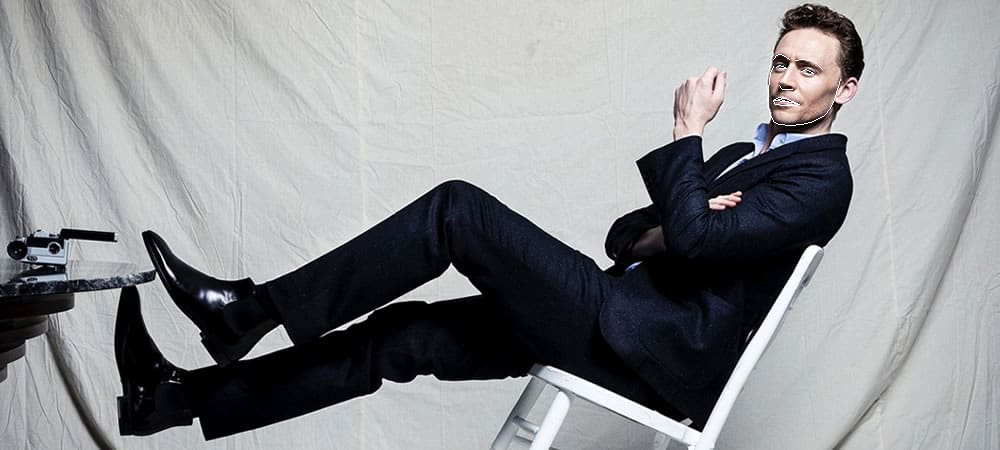

In [331]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image_to_draw = face_recognition.load_image_file(inputDir + "/images/face5.jpg")
# image_to_draw = pil_face_image[:]

# Find all facial features in all the faces in the image
face_landmarks_list_2 = face_recognition.face_landmarks(image_to_draw)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image2 = Image.fromarray(image_to_draw)
d = ImageDraw.Draw(pil_image2)

for face_landmarks in face_landmarks_list_2:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!  
    for facial_feature in face_landmarks.keys():
#         if facial_feature == 'left_eye':
#             d.line((face_landmarks[facial_feature][0],face_landmarks[facial_feature][3]), width=3)
#             d.line((face_landmarks[facial_feature][5],face_landmarks[facial_feature][2]), width=3)
        d.line(face_landmarks[facial_feature], width=1)

# Show the picture
display(pil_image2)

# for face_landmarks in face_landmarks_list:
#     d = ImageDraw.Draw(pil_image, 'RGBA')

#     # Make the eyebrows into a nightmare
#     d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
#     d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
#     d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
#     d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

#     # Gloss the lips
#     d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
#     d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
#     d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
#     d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

#     # Sparkle the eyes
#     d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
#     d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

#     # Apply some eyeliner
#     d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
#     d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

#     display(pil_image)

# for face_location in face_locations:
#     top, right, bottom, left = face_location
    
#     face_image = image[top:bottom, left:right]
#     pil_image = Image.fromarray(face_image)
#     display(pil_image) 
#

In [234]:
#============================ JO
def get_outmost_coordinates(feature_coordinates):
    padding = 20
    return {
        'left': min(feature_coordinates, key=lambda e: e[0])[0] - padding,
        'top': min(feature_coordinates, key=lambda e: e[1])[1] - padding,
        'right': max(feature_coordinates, key=lambda e: e[0])[0] + padding,
        'bottom': max(feature_coordinates, key=lambda e: e[1])[1] + padding,
    }

def crop_feature(landmarks, feature, image):
    if not np.isscalar(feature):
        all_coordinates = {}
        for f in feature:
            all_coordinates[f] = get_outmost_coordinates(landmarks[f])
        
        coordinates = {
            'left': all_coordinates[min(all_coordinates, key=lambda e: all_coordinates[e]['left'])]['left'],
            'top': all_coordinates[min(all_coordinates, key=lambda e: all_coordinates[e]['top'])]['top'],
            'right': all_coordinates[max(all_coordinates, key=lambda e: all_coordinates[e]['right'])]['right'],
            'bottom': all_coordinates[max(all_coordinates, key=lambda e: all_coordinates[e]['bottom'])]['bottom'],
        }
    else: 
        coordinates = get_outmost_coordinates(landmarks[feature])
    
    return image.crop(tuple(coordinates.values()))

lewe oko


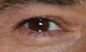

prawe oko


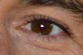

oczy i brwi


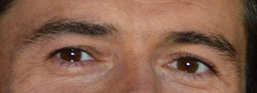

nos


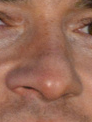

usta


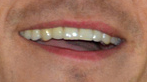

In [238]:
face_landmarks = face_landmarks_list[0]

print("lewe oko")
leftEye = crop_feature(face_landmarks, feature = 'left_eye', image = pil_face_image) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks, feature = 'right_eye', image = pil_face_image)
display(rightEye)

print("oczy i brwi")
eyes = crop_feature(face_landmarks, feature = ['left_eye', 'right_eye', 'left_eyebrow', 'right_eyebrow'], image = pil_face_image)
display(eyes)

print("nos")
nose = crop_feature(face_landmarks, feature = ['nose_bridge', 'nose_tip'], image = pil_face_image)
display(nose)

print("usta")
lips = crop_feature(face_landmarks, feature = ['top_lip', 'bottom_lip'], image = pil_face_image)
display(lips)

lewe oko


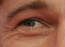

prawe oko


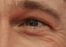

nos


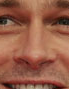

usta


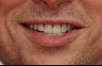

lewe oko


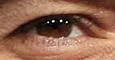

prawe oko


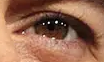

nos


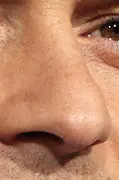

usta


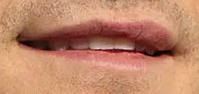

[False, True, True, False]
[(59, 64), (75, 57), (91, 58), (105, 68), (90, 69), (73, 68)]
[0.66758679 0.35883169 0.56262264 0.60061528]


In [243]:
# to wszystko jest w ramach testu, ten cell mozna wyrzucic
# robie chamskie kopiuj wklej bo to powinno byc zrealizonane przez czarka
image2nd = face_recognition.load_image_file(inputDir + "/brad_pitt/brad.jpg")
image3rd = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom_2.jpg")

face_locations_2nd = face_recognition.face_locations(image2nd)
face_locations_3rd = face_recognition.face_locations(image3rd)

for face_location in face_locations_2nd:
    top, right, bottom, left = face_location
    face_image_2 = image2nd[top:bottom, left:right]
    pil_face_image_2 = Image.fromarray(face_image_2)
    
for face_location in face_locations_3rd:
    top, right, bottom, left = face_location
    face_image_3 = image3rd[top:bottom, left:right]
    pil_face_image_3 = Image.fromarray(face_image_3)
    
face_landmarks_list_2 = face_recognition.face_landmarks(face_image_2, model='large')
face_landmarks_list_3 = face_recognition.face_landmarks(face_image_3, model='large')


print("lewe oko")
leftEye = crop_feature(face_landmarks_list_2[0], feature = 'left_eye', image = pil_face_image_2) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks_list_2[0], feature = 'right_eye', image = pil_face_image_2)
display(rightEye)

print("nos")
nose = crop_feature(face_landmarks_list_2[0], feature = ['nose_bridge', 'nose_tip'], image = pil_face_image_2)
display(nose)

print("usta")
lips = crop_feature(face_landmarks_list_2[0], feature = ['top_lip', 'bottom_lip'], image = pil_face_image_2)
display(lips)


print("lewe oko")
leftEye = crop_feature(face_landmarks_list_3[0], feature = 'left_eye', image = pil_face_image_3) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks_list_3[0], feature = 'right_eye', image = pil_face_image_3)
display(rightEye)

print("nos")
nose = crop_feature(face_landmarks_list_3[0], feature = ['nose_bridge', 'nose_tip'], image = pil_face_image_3)
display(nose)

print("usta")
lips = crop_feature(face_landmarks_list_3[0], feature = ['top_lip', 'bottom_lip'], image = pil_face_image_3)
display(lips)


image4 = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom_3.png")
image5 = face_recognition.load_image_file(inputDir + "/orlando_bloom/tego_nie_rozpoznaje_przy_defaultowych_wartosciach.jpg") #Orlando_Bloom_4
face_locations_4 = face_recognition.face_locations(image4)
face_locations_5 = face_recognition.face_locations(image5)
enc_4 = face_recognition.face_encodings(image4, face_locations_4, model='large')
enc_5 = face_recognition.face_encodings(image5, face_locations_5, model='large')

face_encodings = [ 
    face_recognition.face_encodings(image2nd, face_locations_2nd, model='large')[0], 
    face_recognition.face_encodings(image3rd, face_locations_3rd, model='large')[0], 
    face_recognition.face_encodings(image4, face_locations_4, model='large')[0], 
    face_recognition.face_encodings(image5, face_locations_5, model='large')[0], 
]
face_encoding = face_recognition.face_encodings(image, face_locations, model='large')[0]

print(face_recognition.compare_faces(face_encodings, face_encoding))

# single feature
print(face_landmarks['left_eye'])
print(face_recognition.face_distance(face_encodings, face_encoding))


lewe oko


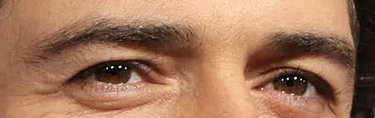

[(201, 409, 468, 141)] [(0, 0, 375, 118)]
[array([-0.05102115,  0.09309785,  0.035631  ,  0.02021889, -0.07377174,
       -0.08950807, -0.0388397 , -0.04007498,  0.12158279, -0.01194712,
        0.23974016, -0.00199662, -0.21627599, -0.11585219,  0.00497689,
        0.09128544, -0.13254835, -0.03140263, -0.14727305, -0.13569698,
        0.01178715,  0.00467167,  0.02531587, -0.00450719, -0.13719919,
       -0.22485466, -0.08057653, -0.13524321,  0.09316476, -0.181622  ,
        0.03359182,  0.05611412, -0.18378659, -0.09528784, -0.01930109,
        0.01821876,  0.02108023, -0.06470916,  0.13138813, -0.01911601,
       -0.10490654, -0.01982196, -0.02789382,  0.25789967,  0.18574366,
        0.00407232,  0.00391617, -0.06259908,  0.0972333 , -0.24176195,
        0.00592358,  0.1232119 ,  0.0760415 ,  0.09440633,  0.04516409,
       -0.14981568,  0.04080665,  0.11314067, -0.18805796,  0.01312431,
        0.0235003 , -0.06354661, -0.08675709, -0.08200653,  0.21256094,
        0.08775183, -

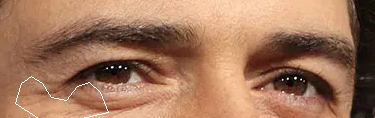

In [308]:
### ta czesc jest zabrana z face_recognition lib - start

import dlib
import face_recognition_models

predictor_68_point_model = face_recognition_models.pose_predictor_model_location()
pose_predictor_68_point = dlib.shape_predictor(predictor_68_point_model)

face_recognition_model = face_recognition_models.face_recognition_model_location()
face_encoder = dlib.face_recognition_model_v1(face_recognition_model)

face_detector = dlib.get_frontal_face_detector()

def _css_to_rect(css):
    """
    Convert a tuple in (top, right, bottom, left) order to a dlib `rect` object
    :param css:  plain tuple representation of the rect in (top, right, bottom, left) order
    :return: a dlib `rect` object
    """
    return dlib.rectangle(css[3], css[0], css[1], css[2])

def _raw_face_locations(img, number_of_times_to_upsample=1, model="hog"):
    """
    Returns an array of bounding boxes of human faces in a image
    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param model: Which face detection model to use. "hog" is less accurate but faster on CPUs. "cnn" is a more accurate
                  deep-learning model which is GPU/CUDA accelerated (if available). The default is "hog".
    :return: A list of dlib 'rect' objects of found face locations
    """
    if model == "cnn":
        return cnn_face_detector(img, number_of_times_to_upsample)
    else:
        return face_detector(img, number_of_times_to_upsample)

    
def _raw_face_landmarks(face_image, face_locations=None, model="large"):
    if face_locations is None:
        face_locations = _raw_face_locations(face_image)
    else:
        face_locations = [_css_to_rect(face_location) for face_location in face_locations]

    pose_predictor = pose_predictor_68_point

    if model == "small":
        pose_predictor = pose_predictor_5_point

    return [pose_predictor(face_image, face_location) for face_location in face_locations]


def face_encodings(face_image, known_face_locations=None, num_jitters=1, model="small"):
    """
    Given an image, return the 128-dimension face encoding for each face in the image.
    :param face_image: The image that contains one or more faces
    :param known_face_locations: Optional - the bounding boxes of each face if you already know them.
    :param num_jitters: How many times to re-sample the face when calculating encoding. Higher is more accurate, but slower (i.e. 100 is 100x slower)
    :param model: Optional - which model to use. "large" or "small" (default) which only returns 5 points but is faster.
    :return: A list of 128-dimensional face encodings (one for each face in the image)
    """
    raw_landmarks = _raw_face_landmarks(face_image, known_face_locations, model)
    return [np.array(face_encoder.compute_face_descriptor(face_image, raw_landmark_set, num_jitters)) for raw_landmark_set in raw_landmarks]

enc = face_recognition.face_encodings(image3rd, face_locations_3rd, model='large')[0]
own_enc = face_encodings(image3rd, face_locations_3rd, model='large')[0]

# print(enc == own_enc)


### ta czesc jest zabrana z face_recognition lib - end

# encoding tylko czesci ciala

print("lewe oko")
leftEye = crop_feature(face_landmarks_list_3[0], feature = ['left_eye', 'right_eye', 'left_eyebrow', 'right_eyebrow'], image = pil_face_image_3) # opcjonalnie do dolozenia brewki
display(leftEye)
path = inputDir + '/orlando_bloom/left_eye.jpg'
leftEye.save(path)

partialImage = face_recognition.load_image_file(path)
face_locations_partial = face_recognition.face_locations(partialImage)

dimensions = tuple([0, 0, leftEye.size[0], leftEye.size[1]])

print(face_locations, [dimensions])

raw_landmarks = _raw_face_landmarks(image3rd, [dimensions], 'large')
partial_enc = [np.array(face_encoder.compute_face_descriptor(image3rd, raw_landmark_set, 1)) for raw_landmark_set in raw_landmarks]
print(partial_enc)

partial_landmarks = face_recognition.face_landmarks(image3rd, [dimensions], 'large')

landmarks_as_tuples = [[(p.x, p.y) for p in landmark.parts()] for landmark in raw_landmarks]
print(landmarks_as_tuples[0], len(landmarks_as_tuples[0]))


pil_image = leftEye #Image.fromarray(leftEye)
d = ImageDraw.Draw(pil_image)

d.polygon(landmarks_as_tuples[0])
# for point in landmarks_as_tuples[0]:
#     d.point(point)
    
display(pil_image) # wrong result, we can't use this to determine encoding
# 1. can we determine which part of encoding is the eye?
# 2. can we use different comparision? or different encoding system, and only use face_recognition for creating smaller images 
# 3. perhaps model can be changed and instead of whole face, we can use one that was trained only for noses, eyes, mouths etc
# 4. should we drop this idea, it's not in the doc

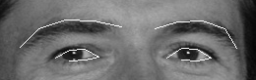

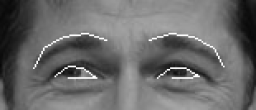

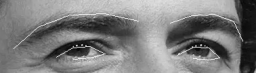

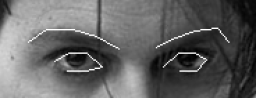

left eye orlando 1 -  [(201, 272), (215, 264), (231, 263), (245, 271), (231, 274), (215, 275)]
left eye pitt -  [(291, 152), (299, 146), (308, 147), (316, 153), (308, 153), (299, 153)]
left eye orlando 2 -  [(556, 493), (580, 479), (605, 477), (628, 488), (606, 494), (581, 496)]
left eye depp -  [(472, 210), (482, 204), (495, 204), (506, 214), (494, 217), (481, 217)]
0.9846153846153847 1.6516129032258065 0.6772486772486772 1.391304347826087
after scaling
left eye orlando 1 -  [(201, 272), (215, 264), (231, 263), (245, 271), (231, 274), (215, 275)]
left eye pitt -  [(480.6193548387097, 251.04516129032257), (493.8322580645161, 241.13548387096773), (508.6967741935484, 242.78709677419354), (521.9096774193548, 252.69677419354838), (508.6967741935484, 252.69677419354838), (493.8322580645161, 252.69677419354838)]
left eye orlando 2 -  [(556, 493), (580, 479), (605, 477), (628, 488), (606, 494), (581, 496)]
left eye depp -  [(472, 210), (482, 204), (495, 204), (506, 214), (494, 217), (481, 217

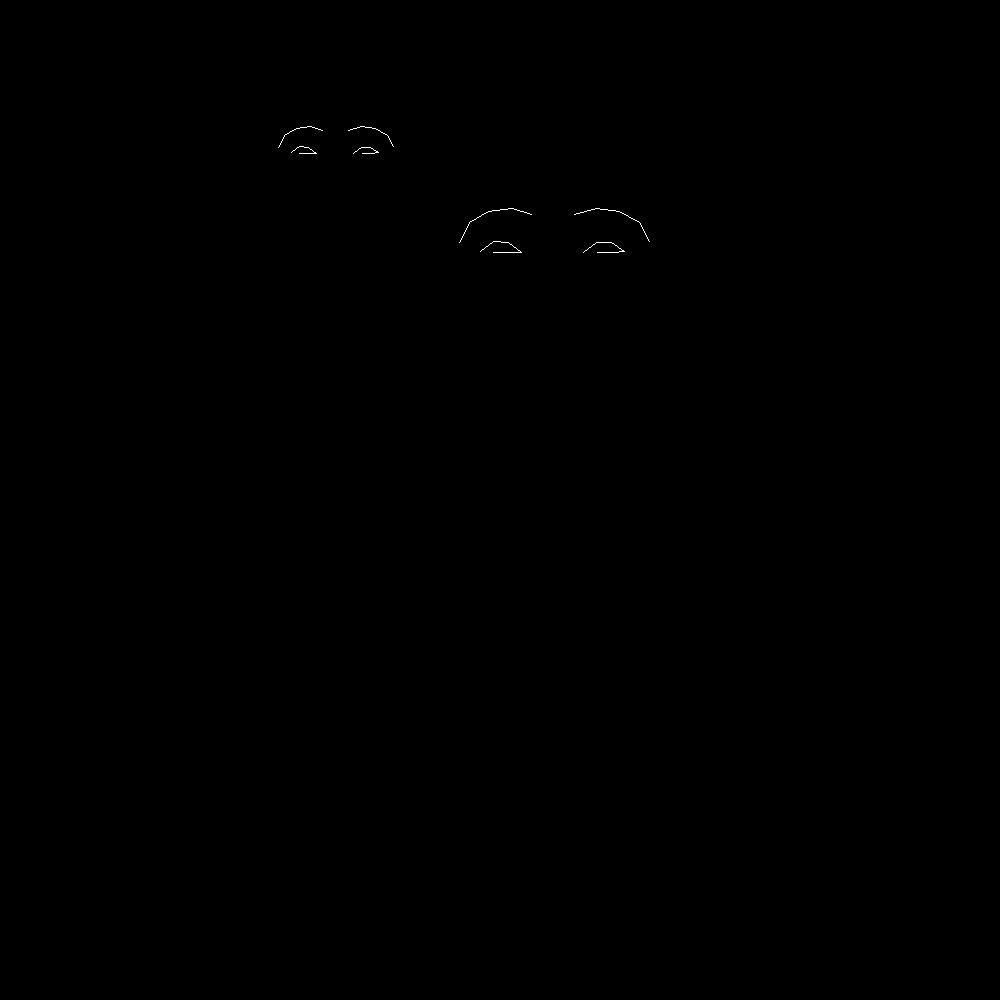

In [470]:
# 1. can we determine which part of encoding is the eye? - no we cannot, it's a deep learning model, therefore it decides
# what distance it gives what weights and we cannot access this knowledge

# 2 - yes. feature vectorization, I am going to go w/ this approach below

# ============================ comparing only single feature of face

# ======= ten fragment kodu to funkcje pomocnicze stąd: https://github.com/nlhkh/face-alignment-dlib/blob/master/utils.py
LEFT_EYE_INDICES = [36, 37, 38, 39, 40, 41]
RIGHT_EYE_INDICES = [42, 43, 44, 45, 46, 47]

def angle_between_2_points(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    tan = (y2 - y1) / (x2 - x1)
    return np.degrees(np.arctan(tan))

def extract_eye(shape, eye_indices):
    points = map(lambda i: shape.part(i), eye_indices)
    return list(points)

def extract_eye_center(shape, eye_indices):
    points = extract_eye(shape, eye_indices)
    xs = map(lambda p: p.x, points)
    ys = map(lambda p: p.y, points)
    return sum(xs) // 6, sum(ys) // 6

def extract_left_eye_center(shape):
    return extract_eye_center(shape, LEFT_EYE_INDICES)

def extract_right_eye_center(shape):
    return extract_eye_center(shape, RIGHT_EYE_INDICES)

def get_rotation_matrix(p1, p2):
    angle = angle_between_2_points(p1, p2)
    x1, y1 = p1
    x2, y2 = p2
    xc = (x1 + x2) // 2
    yc = (y1 + y2) // 2
    M = cv2.getRotationMatrix2D((xc, yc), angle, 1)
    return M
# ===== koniec kodu z gh

tempDir = inputDir + '/temp'
features_to_mark = ['left_eye', 'right_eye', 'left_eyebrow', 'right_eyebrow']
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
desired_width = 256
    
def get_face_image(face_location, image):
    top, right, bottom, left = face_location
    return image.crop((left, top, right, bottom))

def draw_landmarks(face_landmarks, image):
    drawn_image = Image.fromarray(image)
    d = ImageDraw.Draw(drawn_image)
    for facial_feature in face_landmarks.keys():
        if facial_feature in features_to_mark:
            d.line(face_landmarks[facial_feature], width=1)
    return drawn_image

def preprocess_image(path_to_image):
    preprocessed_image = cv2.imread(inputDir + path_to_image, cv2.IMREAD_GRAYSCALE)
    height, width = preprocessed_image.shape[:2]
    
    detected_faces = detector(preprocessed_image, 1)
    shape = predictor(preprocessed_image, detected_faces[0]) # obslugujemy tylko case 1 twarz wykryta zawsze
    
    left_eye = extract_left_eye_center(shape)
    right_eye = extract_right_eye_center(shape)
    M = get_rotation_matrix(left_eye, right_eye)
    rotated = cv2.warpAffine(preprocessed_image, M, (width, height), flags=cv2.INTER_CUBIC)
    
    if not cv2.imwrite(tempDir + path_to_image, rotated):
        raise Exception('Could not write image - there is a good chance you forgot to create directory') # uwaga, folder musi istniec, cv2 nie utworzy go i wyrzuci ten blad
    
def resize_image(image):
    return imutils.resize(np.asarray(image), width=desired_width) 
        
def get_resize_scale(pre_process, post_process):
    pre_width, pre_height = pre_process.size
    post_width, post_height = post_process.size    
    return post_width / pre_width

def scale_landmarks(face_landmarks, scale):
    return { feature: [ tuple([scale*coord for coord in point]) for point in points_list] for feature, points_list in face_landmarks.items() }

    
# preprocessing image - turn to grayscale & rotate so eyes are in straight line 

preprocess_image('/orlando_bloom/Orlando_Bloom.jpg')
preprocess_image('/brad_pitt/brad.jpg')
preprocess_image('/orlando_bloom/Orlando_Bloom_2.jpg')
preprocess_image('/johnny_depp/johnny_depp_2.jpg')

# preparing photo w/ landmark mask

image_orlando_1 = face_recognition.load_image_file(tempDir + "/orlando_bloom/Orlando_Bloom.jpg")
image_pitt = face_recognition.load_image_file(tempDir + "/brad_pitt/brad.jpg")
image_orlando_2 = face_recognition.load_image_file(tempDir + "/orlando_bloom/Orlando_Bloom_2.jpg")
image_depp = face_recognition.load_image_file(tempDir + "/johnny_depp/johnny_depp_2.jpg")

face_location_orlando_1 = face_recognition.face_locations(image_orlando_1)[0]
face_location_pitt = face_recognition.face_locations(image_pitt)[0]
face_location_orlando_2 = face_recognition.face_locations(image_orlando_2)[0]
face_location_depp = face_recognition.face_locations(image_depp)[0]

face_landmarks_orlando_1 = face_recognition.face_landmarks(image_orlando_1, model='large')[0]
face_landmarks_pitt = face_recognition.face_landmarks(image_pitt, model='large')[0]
face_landmarks_orlando_2 = face_recognition.face_landmarks(image_orlando_2, model='large')[0]
face_landmarks_depp = face_recognition.face_landmarks(image_depp, model='large')[0]

face_image_orlando_1 = draw_landmarks(face_landmarks_orlando_1, image_orlando_1)
# face_image_orlando_1 = get_face_image(face_location_orlando_1, face_image_orlando_1)
face_image_pitt = draw_landmarks(face_landmarks_pitt, image_pitt)
# face_image_pitt = get_face_image(face_location_pitt, face_image_pitt)
face_image_orlando_2 = draw_landmarks(face_landmarks_orlando_2, image_orlando_2)
# face_image_orlando_2 = get_face_image(face_location_orlando_2, face_image_orlando_2)
face_image_depp = draw_landmarks(face_landmarks_depp, image_depp)

# display(face_image_orlando_1)
# display(face_image_pitt)
# display(face_image_orlando_2)

# extracting feature

eyes_orlando_1 = crop_feature(face_landmarks_orlando_1, feature = features_to_mark, image = face_image_orlando_1)
eyes_pitt = crop_feature(face_landmarks_pitt, feature = features_to_mark, image = face_image_pitt)
eyes_orlando_2 = crop_feature(face_landmarks_orlando_2, feature = features_to_mark, image = face_image_orlando_2)
eyes_depp = crop_feature(face_landmarks_depp, feature = features_to_mark, image = face_image_depp)

# display(eyes_orlando_1)
# display(eyes_pitt)
# display(eyes_orlando_2)
# display(eyes_depp)

# calculating feature vector

# we should always have padding around outliers of eyes/eyebrows so we only care about scaling
# these images to same width (we are sure these are in same position already)
resized_eyes_orlando_1 = Image.fromarray(resize_image(eyes_orlando_1))
resized_eyes_pitt = Image.fromarray(resize_image(eyes_pitt))
resized_eyes_orlando_2 = Image.fromarray(resize_image(eyes_orlando_2))
resized_eyes_depp = Image.fromarray(resize_image(eyes_depp))

display(resized_eyes_orlando_1)
display(resized_eyes_pitt)
display(resized_eyes_orlando_2)
display(resized_eyes_depp)
# TODO: czy padding nie jest dziabniety przez przeskalowanie? odleglosc od granic jest inna

# get scale to scale down mask too? if we want to calculate based on them

print('left eye orlando 1 - ', face_landmarks_orlando_1['left_eye'])
print('left eye pitt - ', face_landmarks_pitt['left_eye'])
print('left eye orlando 2 - ', face_landmarks_orlando_2['left_eye'])
print('left eye depp - ', face_landmarks_depp['left_eye'])

scale_orlando_1 = get_resize_scale(eyes_orlando_1, resized_eyes_orlando_1)
scale_pitt = get_resize_scale(eyes_pitt, resized_eyes_pitt)
scale_orlando_2 = get_resize_scale(eyes_orlando_2, resized_eyes_orlando_2)
scale_depp = get_resize_scale(eyes_depp, resized_eyes_depp)

print(scale_orlando_1, scale_pitt, scale_orlando_2, scale_depp)

rescaled_face_landmarks_pitt = scale_landmarks(face_landmarks_pitt, scale_pitt)

print('after scaling')
print('left eye orlando 1 - ', face_landmarks_orlando_1['left_eye'])
print('left eye pitt - ', rescaled_face_landmarks_pitt['left_eye'])
print('left eye orlando 2 - ', face_landmarks_orlando_2['left_eye'])
print('left eye depp - ', face_landmarks_depp['left_eye'])

black_board = Image.new('RGB', (1000, 1000), 'black')
drawing = draw_landmarks(face_landmarks_pitt, np.array(black_board))
drawing = draw_landmarks(rescaled_face_landmarks_pitt, np.array(drawing))
display(drawing)

# orlando_distances = distance.cdist(face_landmarks_orlando_1['left_eye'], face_landmarks_orlando_1['left_eye'], 'euclidean')
# orlando2_distances = distance.cdist(face_landmarks_orlando_2['left_eye'], face_landmarks_orlando_2['left_eye'], 'euclidean')
# depp_distances = distance.cdist(face_landmarks_depp['left_eye'], face_landmarks_depp['left_eye'], 'euclidean')
# print(sum(orlando_distances - orlando2_distances))
# print(sum(orlando_distances - depp_distances))
# print(orlando2_distances)
# print(depp_distances)

# print(np.linalg.norm(orlando_distances - depp_distances, axis=1))

# comparing feature vectors using euclidean distance


#============================ koniec JO